# Grade: /100 pts

# Assignment 05: Model Selection & Cross Validation

In this assignment you will be using a #TidyTuesday dataset on Spotify songs to build a classification model for predicting Spotify song popularity.

The dataset has already been preprocessed, and is ready to be used! 

The Spotify songs dataset has provided you with data for 30947 Spotify songs.  Your job: build a model or models, perform model selection using cross validation techniques, and evaluate your final selected model.

### The Dataset

The data is stored in a csv file called `spotify_pre.csv`.  The data includes some information about playlist genre, playlist subgenre, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration. The target variable is `track_popularity`, which has two categories `high` and `low`.


### Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline. 

5.  Your submission document should be saved in the form: `LastName_FirstName_Assignment5.ipynb`

---

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error,roc_curve, auc, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin

pd.set_option('display.max_columns', 500)
plt.style.use('ggplot')
%matplotlib inline

_____

### Question 1: /15pts

First, import the dataset `spotify_pre.csv` as a dataframe and print out a few rows and get metadata of the csv file to have a rough understanding of the type of each column.

In [28]:
# Import the dataset etc.
df = pd.read_csv("spotify_pre.csv")
df.head()


,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_m
0,low,pop,dance pop,0.748,0.916,6,-2.634,major,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.245900
1,low,pop,dance pop,0.726,0.815,11,-4.969,major,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.710000
2,high,pop,dance pop,0.675,0.931,1,-3.432,minor,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.943600
3,low,pop,dance pop,0.718,0.930,7,-3.778,major,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.818217
4,low,pop,dance pop,0.650,0.833,1,-4.672,major,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.150867


In [29]:
#to get metadata
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30947 entries, 0 to 30946
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_popularity   30947 non-null  object 
 1   playlist_genre     30947 non-null  object 
 2   playlist_subgenre  30947 non-null  object 
 3   danceability       30947 non-null  float64
 4   energy             30947 non-null  float64
 5   key                30947 non-null  int64  
 6   loudness           30947 non-null  float64
 7   mode               30947 non-null  object 
 8   speechiness        30947 non-null  float64
 9   acousticness       30947 non-null  float64
 10  instrumentalness   30947 non-null  float64
 11  liveness           30947 non-null  float64
 12  valence            30947 non-null  float64
 13  tempo              30947 non-null  float64
 14  duration_m         30947 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 3.5+ MB
None


Finally create a barchart of playlist_subgenre with each bar showing the proportion of track_popularity categories (use ggplot with 'fill' option set to 'track_popularity'). Make sure to flip cartesian coordinates so that horizontal becomes vertical, and vertical, horizontal.

**Make sure to check out some online resources for plotting with ggplot in Python**

In [30]:
# Code to construct the barchart
from ggplot import *
##i have been trying to figure out a work around for this error and I have not come to a conclusion

AttributeError: module 'pandas' has no attribute 'tslib'

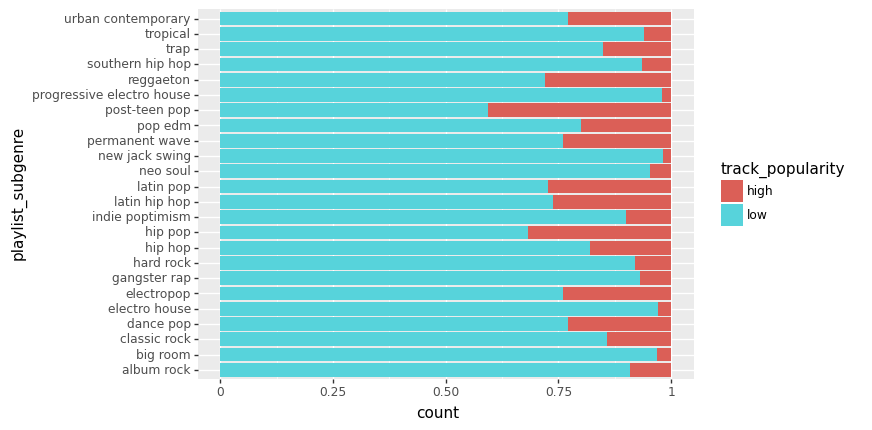

In [31]:
p = ggplot(df, aes(x='playlist_subgenre', fill='track_popularity')) + \
    geom_bar(position='fill') + \
    coord_flip()
print(p)

Which category of playlist_subgenre is more likely to gain popularity?

As indicated above, post-teen pop is the subgenre to gain popularity

_____________

### Question 2: /10pts


Now, you will create boxplots with x axis set to `playlist_genre` and y axis set to `instrumentalness` and color option set to `track_popularity`. Make sure to change the y axis scale into log10 scale for a better representation.

/Users/oren/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
/Users/oren/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 11500 rows containing non-finite values.


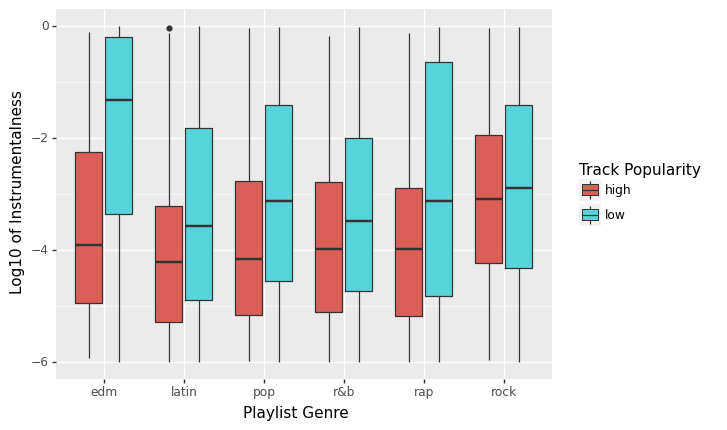

<ggplot: (8775093037770)>

In [32]:
## Your code
df['instrumentalness_log10'] = np.log10(df['instrumentalness'])
(ggplot(df, aes(x='playlist_genre', y='instrumentalness_log10', fill='track_popularity'))
 + geom_boxplot()
 + labs(x='Playlist Genre', y='Log10 of Instrumentalness', fill='Track Popularity')) #for labels

/Users/oren/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
/Users/oren/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:333: PlotnineWarning: stat_boxplot : Removed 11500 rows containing non-finite values.


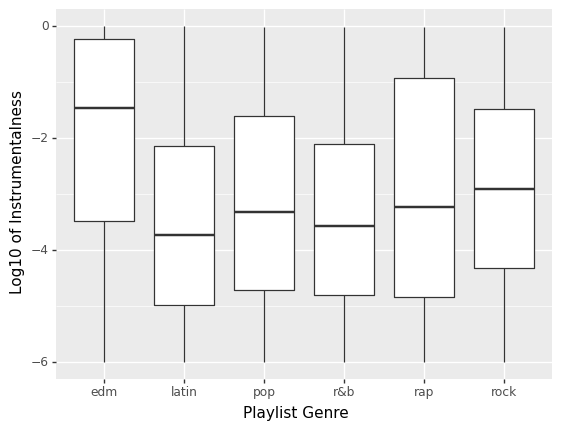

<ggplot: (8775099183306)>

In [33]:
## Your code
df['instrumentalness_log10'] = np.log10(df['instrumentalness'])
(ggplot(df, aes(x='playlist_genre', y='instrumentalness_log10'))
 + geom_boxplot()
 + labs(x='Playlist Genre', y='Log10 of Instrumentalness')) #for labels

With track_popularity taken into account, does instrumentalness score differ within some of playlist genres?

it is apparent that usually a track with higher popularity has a higher instrumentalness score

___________

### Question 3: /10

Create a basic logistic regression model (with default penalization) named `model1`. You need to create a model pipeline to be fit later. (Use `solver='lbfgs'`, `max_iter=10000` and `random_state=0`)

The predictor variables are `mode`, and `loudness`. Use the following chunk of code. You will use `Data1` to build your model.

In [34]:
# Your code

Data1 = df[['track_popularity', 'mode', 'loudness']] 
Data1 = pd.get_dummies(Data1, drop_first=True) 
Data1 = Data1.rename({'track_popularity_low': 'track_popularity'}, axis='columns') 
Data1.head()

model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0))
])


Now that you have created the pipeline, fit `model1` for predicting the target variable, track_popularity, with the two predictors. Use a 70/30 train-test split of the data, remember to set `random_state=0` in the function `train_test_split`. After that, evaluate this model plotting the ROC curve and reporting the AUC value. 

In [35]:
# np.random.seed(0);np.random.rand(5)
# Create the training and test data
X = Data1.drop('track_popularity', axis='columns').values 
y = Data1.track_popularity.values 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

#Fit the model
model1.fit(Xtrain, ytrain)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=10000, random_state=0))])

0.566


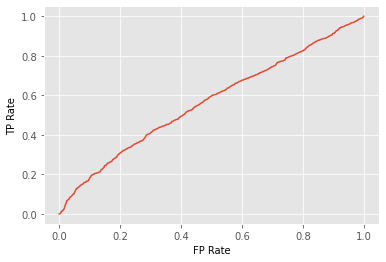

In [36]:
# Create the ROC curve and report AUC
y_pred_prob_ = model1.predict_proba(Xtest)[:, 1]

fpr1, tpr1, _ = roc_curve(ytest, y_pred_prob_) 
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob_)

ax = sns.lineplot(x=fpr1,y=tpr1)

ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")

print(auc(fpr1,tpr1).round(3))

At this point, would you use the baseline model as your final model? Why or why not?

above is not a good classifier, as the auc is close to 0, and the roc is pretty linear with no clear ability to distinguish between classes well.

____________

### Question 4: /40

Here, we want to determine the best single numeric feature model to predict the track_popularity. To be specific, you are going to create a model per each predictor: 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_m'. Make sure to use the cross-validation technique to make your decision. Please make sure to use 'pd.get_dummies(, drop_first=True)' to encode the target variable, and change the column name 'track_popularity_low' to 'track_popularity', as in previous question.

You remember that *cross-validation* technique is used to find the expected test error of the models. In addition, in the next code, 5 different folds are displayed using 5 fold cross-validation. In this case it is used `StratifiedKFold()` function.

#### 4.1: /5
**Define a function `AUC_calculation` with inputs `(X, y, index_train, index_test)`  which calculates the AUC of the `model1` trained on `index_train` and tested on `index_test`.**

In [37]:
# Your code
def AUC_calculation(X, y, index_train, index_test):
    Xtrain, ytrain = X.iloc[index_train], y.iloc[index_train]
    Xtest, ytest = X.iloc[index_test], y.iloc[index_test]
    
    model1.fit(Xtrain,ytrain)
    
    y_pred_prob_ = model1.predict_proba(Xtest)[:, 1]

    fpr1, tpr1, _ = roc_curve(ytest, y_pred_prob_) 
    fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob_)
    
    roc_auc = auc(fpr1,tpr1).round(3)
    
    return roc_auc
    

#### 4.2: /8
**Using `AUC_calculation` create a function named `AUC_cross_validation` which has as input (X, y, n_fold). `AUC_cross_validation` does a `n_fold` cross validation (using `StratifiedKFold`) and its output should be a list with the AUC for each fold.** 

In [38]:
# Your code
def AUC_cross_validation(X,y,n_fold):
    str_kf = StratifiedKFold(n_splits=n_fold) 
    auc_lst = []
    for j, (index_train, index_test) in enumerate(str_kf.split(X,y)):
        roc_auc = AUC_calculation(X, y, index_train, index_test)
        auc_lst.append(roc_auc)
#str_kf = StratifiedKFold(n_splits=5) for j, (index_train, index_test) in enumerate(str_kf.split(X,y)):
 ##enumerate has the index and the elements in the folds
 ##print(k, (index_train, index_test))
#plt.plot(index_train, [j+1 for s in index_train], '.')
#plt.title('Cross Validation ')
    return auc_lst

#### 4.3: /5
**Now you are ready to estimate and compare through cross validation the performance of all the *simple models* that only use one numeric predictor as input. Prepare you dataset here!**

In [39]:
# Your code
predictors = ['track_popularity','danceability', 'energy', 'key', 
            'loudness', 'speechiness', 'acousticness', 
            'instrumentalness', 'liveness', 'valence', 
            'tempo', 'duration_m']


D = df[predictors]
D = pd.get_dummies(D, drop_first=True) 
D = D.rename({'track_popularity_low': 'track_popularity'}, axis='columns') 

all_numeric_data = D[predictors].drop('track_popularity', axis='columns') 

D.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_m,track_popularity
0,0.748,0.916,6,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3.245900,1
1,0.726,0.815,11,-4.969,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2.710000,1
2,0.675,0.931,1,-3.432,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2.943600,0
3,0.718,0.930,7,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2.818217,1
4,0.650,0.833,1,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3.150867,1


#### 4.4: /8

**Use your function `AUC_cross_validation` to compute cross-validation estimates of the AUC for each single numeric feature model, use a data frame (named `AUC_models`) to report the AUC value for each fold and each of the models. (Use `n_fold=10`).**

**The column names of `AUC_models` have to be in the form `Simple-numeric predictor variable`, e.g., `simple-tempo`.**

In [40]:
# Construct AUC_models dataframe
AUC_models = pd.DataFrame(columns=['Fold'] + ['Simple-' + p for p in all_numeric_data])

for p in all_numeric_data:
    X = D[[p]]
    y = D['track_popularity']
    auc_lst = AUC_cross_validation(X, y, n_fold=10)
    AUC_models[f'Simple-{p}'] = auc_lst
# add the fold numbers to the AUC_models dataframe
AUC_models['Fold'] = [f'Fold-{i}' for i in range(1, 11)]

In [41]:
# Print AUC_models dataframe 
print(AUC_models)

      Fold  Simple-danceability  Simple-energy  Simple-key  Simple-loudness  \
0   Fold-1                0.556          0.607       0.482            0.553   
1   Fold-2                0.487          0.358       0.530            0.710   
2   Fold-3                0.465          0.579       0.517            0.529   
3   Fold-4                0.751          0.554       0.458            0.625   
4   Fold-5                0.470          0.569       0.527            0.436   
5   Fold-6                0.459          0.553       0.515            0.586   
6   Fold-7                0.644          0.395       0.488            0.745   
7   Fold-8                0.528          0.447       0.513            0.691   
8   Fold-9                0.580          0.867       0.518            0.338   
9  Fold-10                0.542          0.674       0.495            0.468   

   Simple-speechiness  Simple-acousticness  Simple-instrumentalness  \
0               0.459                0.597                 

#### 4.5: /7

**Decide which of the studied models has the best and the worst performance, using a boxplot (without presenting outliers) that shows the distribution of the previous AUC scores for every model.** (Do not forget labels!)

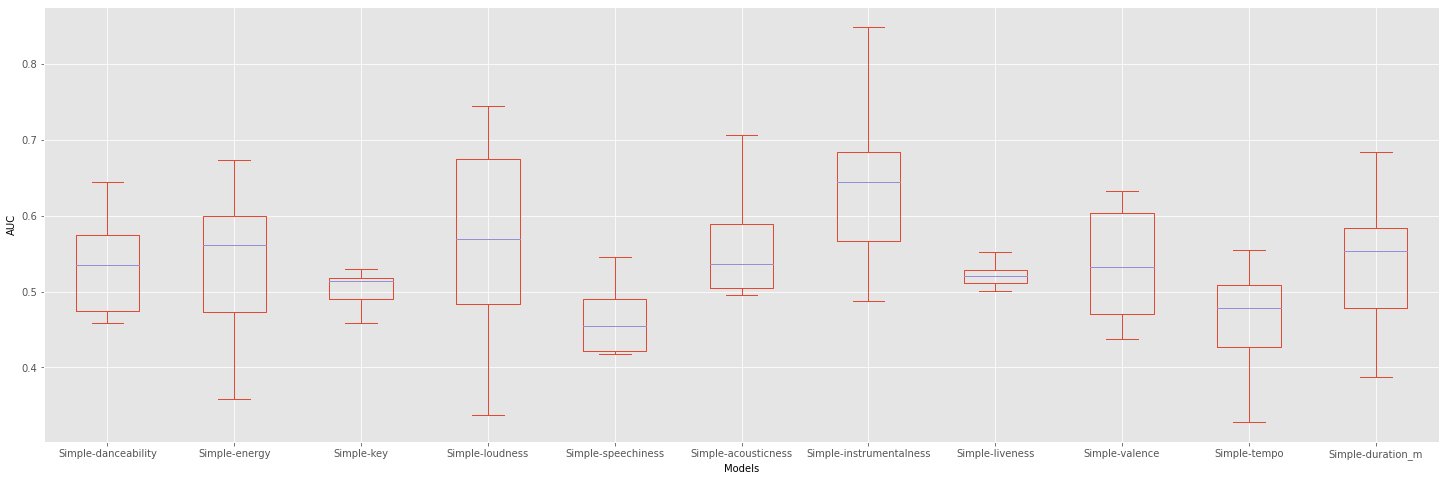

In [42]:
AUC_nofold = AUC_models.drop('Fold', axis='columns') 
AUC_nofold.plot(kind="box", figsize = (25, 8), showfliers=False)
plt.xlabel('Models')
plt.ylabel('AUC') 
plt.show()

It appears that instrumentalness is the model with the best performance as it seems to have the highest median and the range starts and ends the highest. The model that seems to have the worst performance is either speechiness or tempo, as they both have small AUC.

#### 4.6: /7
**Now, lets compare these models with the one including all the numeric variables** 

**You again will use  10-fold cross-validation to determine if this new model has better performance, and at the end, you want to plot the boxplots with the information of this new model.**  

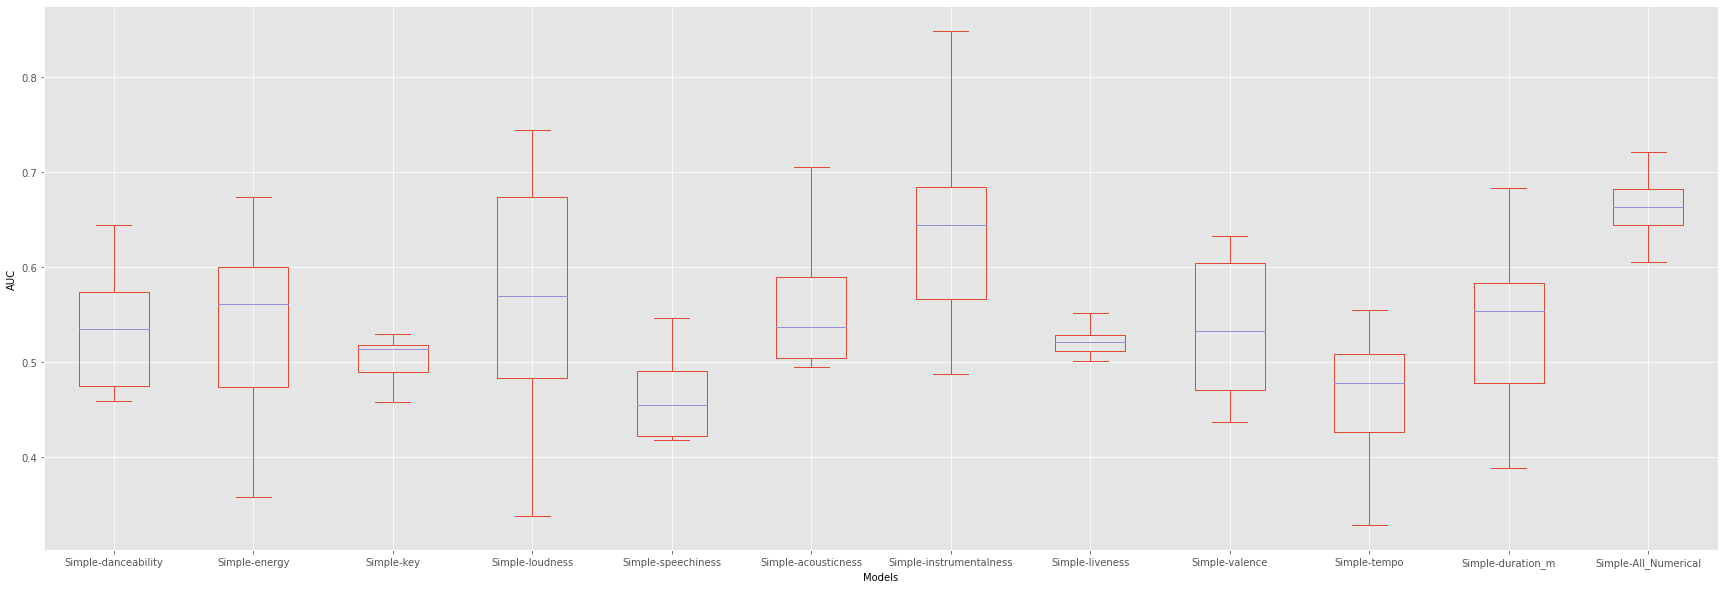

In [43]:
# Your code
X = all_numeric_data
y = D['track_popularity']

All_num_AUC_model = pd.DataFrame(columns=['Fold'] + ['Simple-All_Numerical'])

all_numeric_lst = AUC_cross_validation(X, y, n_fold=10)
All_num_AUC_model['Simple-All_Numerical'] = all_numeric_lst
All_num_AUC_model['Fold'] = [f'Fold-{i}' for i in range(1, 11)]

All_num_AUC_nofold = All_num_AUC_model.drop('Fold', axis='columns')
all_models = AUC_nofold.copy()
all_models['Simple-All_Numerical'] = All_num_AUC_nofold.values

all_models.plot(kind="box", figsize = (30, 10), showfliers=False)
plt.xlabel('Models')
plt.ylabel('AUC') 
plt.show()

In [ ]:
#or
Xall_final, yall_final = Data1.drop(['track_popularity'], axis=1), Data1.track_popularity
list_auc_all = AUC_cross_validation(Xall_final, yall_final, n_fold=10)
AUC_models['All_numeric']=list_auc_all
# Print the new data frame 
AUC_models
# Plot the boxplots
plt.figure(figsize=(15,9))
boxplots = AUC_models[AUC_models.mean().sort_values().index]
sns.boxplot(x='variable', y='value', data=pd.melt(boxplots), showfliers=False)
plt.xticks(rotation=90)
plt.xlabel('Simple models with only one numeric variable as predictor')
plt.ylabel('AUC')

_____________

### Question 5: /10

Finally, you are going to include all the numeric predictors as well as the categorical variable `mode` in the model. Make sure to encode the categorical variable. Use the 10-fold cross-validation to evaluate the performance of this model. Print the AUC mean for all the models (including previous models) in ascending order.

In [45]:
# Your code
new_data = df[predictors+["mode"]]
new_preds = new_data.drop('track_popularity', axis='columns') 

Data = pd.get_dummies(new_preds, drop_first=True) 
Data.head()

mode_AUC_model = pd.DataFrame(columns=['Fold'] + ['Simple-with_mode'])

X = Data
y = D['track_popularity']

mode_numeric_lst = AUC_cross_validation(X, y, n_fold=10)
mode_AUC_model['Simple-with_mode'] = mode_numeric_lst
mode_AUC_model['Fold'] = [f'Fold-{i}' for i in range(1, 11)]


complete_all_models = all_models.copy()
complete_all_models['Simple-with_mode'] = mode_AUC_model['Simple-with_mode'].values
# complete_all_models
mean_dct = {}
for col in complete_all_models:
    mean = np.mean(complete_all_models[col].values).round(4)
    mean_dct[col] = mean
    
ascending_mean_list = sorted(mean_dct.items(), key=lambda x:x[1])
for i in ascending_mean_list:
    print(i)


('Simple-speechiness', 0.4328)
('Simple-tempo', 0.4604)
('Simple-key', 0.5043)
('Simple-liveness', 0.5248)
('Simple-duration_m', 0.5326)
('Simple-valence', 0.5357)
('Simple-danceability', 0.5482)
('Simple-energy', 0.5603)
('Simple-acousticness', 0.5622)
('Simple-loudness', 0.5681)
('Simple-instrumentalness', 0.6333)
('Simple-with_mode', 0.6603)
('Simple-All_Numerical', 0.6608)


In [2]:
#or
AUC_models.mean(axis=0).sort_values()

Which of the above models is the best model? Why? 

The best model seems the be the simple-All_numerical model that contains the original 11 strictly numerical values, as it has the largest area under curve

______________

### Question 6: /15pts

Now it is time to train it on all the training data. Estimate the performance of this model on the test data and do the following (For this, use a 70/30 train-test split of the data, remember to set `random_state=0` in the function `train_test_split` ): 

- Use boostrap technique to find the 95% CI for the AUC. 
- Plot the distribution of the boostrap AUC scores.

In [66]:
def bootstrap(ytest, ypred, num_rounds=1000):
    aucs = []
    for i in range(num_rounds):
        idx = np.random.choice(range(len(ytest)), size=len(ytest), replace=True)
        aucs.append(roc_auc_score(ytest.iloc[idx], ypred[idx]))
    return aucs

In [67]:
# Your code
X = all_numeric_data
y = D['track_popularity']

#split the data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

#Use earlier model to fit
model1.fit(Xtrain, ytrain)

#predict the probabilities for the test set
y_test_pred = model1.predict_proba(Xtest)[:, 1]

#AUC score on test set
auc_score = roc_auc_score(ytest, y_test_pred)

print("The AUC score on the test set is: ", auc_score.round(5))


The AUC score on the test set is:  0.69515


In [100]:
# Call Bootstrap 
auclsts = bootstrap(ytest, y_test_pred)

#Bootstrap with CI of 95%, so low is 2.5, high is 97.5
ci_lower = np.percentile(auclsts,2.5)
ci_upper = np.percentile(auclsts,97.5)
print("95% CI for AUC is from {} to {}".format(ci_lower.round(5), ci_upper.round(5)))

95% CI for AUC is from 0.68087 to 0.70896


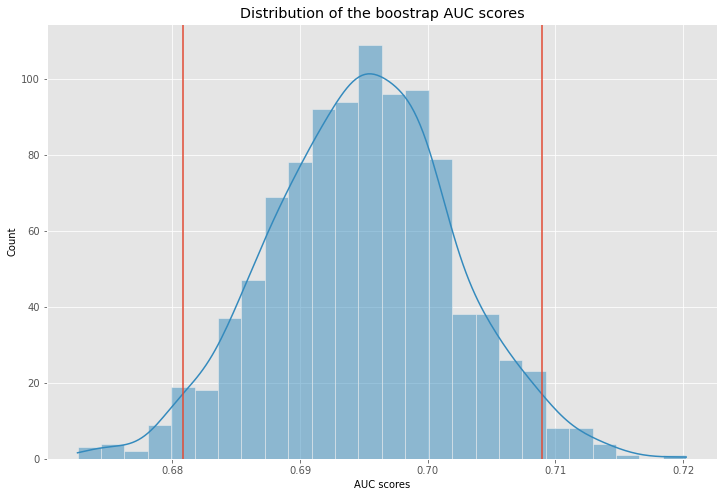

In [103]:
#Plotting the distribution of the boostrap AUC scores
plt.figure(figsize=(12,8))
sns.histplot(auclsts, kde=True)
plt.axvline(ci_lower)
plt.axvline(ci_upper)
plt.title("Distribution of the boostrap AUC scores")
plt.xlabel("AUC scores")
plt.show()

Is the test AUC close to the AUC cross validation of the model you chose? Why do you think this is the case?

the test AUC of 0.69515 is not close to the one i chose of 0.6608, as a matter of fact, it is not anywhere close to the lower bound of the bootstrapping model, this is most likely due to the fact that it is trying to normalize  the data, when it i